In [9]:
from numpy import mean , std
from pandas import read_csv
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [10]:
def load_dataset(filname):
    data = read_csv(filname, header=None)
    dataset = data.values
    X = dataset[:, :-1]
    y = dataset[:, -1]
    return X, y

In [11]:
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [12]:
X, y = load_dataset('pima-indians-diabetes.csv')

In [13]:
num_features = [i+1 for i in range(X.shape[1])]

In [14]:
results = list()

In [15]:
for k in num_features:
    model = LogisticRegression(solver='liblinear')
    fs = SelectKBest(score_func=f_classif, k=k)
    pipeline = Pipeline(steps=[('anova', fs), ('lr', model)])
    scores = evaluate_model(pipeline)
    results.append(scores)
    print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))

>1 0.748 (0.048)
>2 0.756 (0.042)
>3 0.761 (0.044)
>4 0.759 (0.042)
>5 0.770 (0.041)
>6 0.766 (0.042)
>7 0.770 (0.042)
>8 0.768 (0.040)


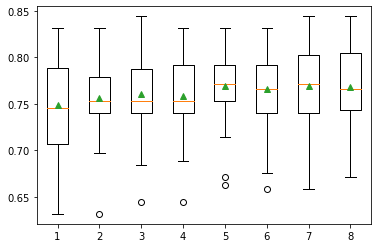

In [17]:
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()